# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Jimin Lee

Student ID: 508714

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go. Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [1]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

The data contains information about rides in Boston, Massachusetts and the weather information corresponding to the day of the ride. The data is most likely from Uber and Lyft. The owner of the data does not specify how the data was obtained. There are 693071 examples and 57 features. Approximately half of the data is from Uber and the other half is from Lyft. The features describe each ride by its ride type, location, date, price, and weather-related information such as temperature, precipitation, and humidity. The features have a variety of data types, from integers and floats to objects like string. For example, source, timezone, destination features are in string, while weather-specific informations such as temperature, humidity, and precipIntensity are in float. The only feature with NaN values, however, is the price feature, where only 637976 out of 693071 are non-null. Some of the categorical features have categories that are not very interpretable, such as the 'product_id' which contains strings of letters and numbers in half of the category names. Another interesting is the time range of the data is between November and December, which explains why many weather-specific features such as temperature have small range. The ranges of latitude and longitude features are also small, most likely because the data only applies to rides in Boston, Massachusetts. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('./utility/data/rideshare_kaggle.csv')
data.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
print(data.shape)
print(data.columns)

(693071, 57)
Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'app

In [5]:
# understand the data types of each feature
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
# what "object" data type is the datetime? 
print(type(data['datetime'][0]))

<class 'str'>


In [7]:
print(data['cab_type'].value_counts())

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [8]:
# unique labels of 'product_id'
print(data['product_id'].value_counts())

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64


In [9]:
# the range of months in the data
print(f"The range of months in the data is from {data['month'].min()} to {data['month'].max()}")

The range of months in the data is from 11 to 12


In [10]:
# the features with range of less than 10 in their respective units:
print([i for i in data.select_dtypes(include = [np.number]).columns if (data[i].max() - data[i].min() < 10)])

['month', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'precipIntensity', 'precipProbability', 'humidity', 'visibility', 'cloudCover', 'uvIndex', 'visibility.1', 'moonPhase', 'precipIntensityMax']


In [11]:
# range of latitude and longitude values: 
print(data['latitude'].min(), data['latitude'].max())
print(data['longitude'].min(), data['longitude'].max())

42.2148 42.3661
-71.1054 -71.033


In [12]:
# na values in each column
#data.isna().sum(axis=0)
#data['source'].value_counts()
#data['name'].value_counts()

In [13]:
# categories of short_summary and long_summary
#print(data['short_summary'].value_counts())
#print()
#print(data['long_summary'].value_counts())

### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

We need to handle the NaN values identified in the 'price' feature.  Dropping the rows with NaN values is not the most ideal, because they may provide imporant information. However, since the owner did not provide the source of the data or explain how he collected the data, dropping the rows is the best compromise now.

In [14]:
clean_data = data.dropna()
data.isna().sum(axis=0)

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

In [15]:
data.select_dtypes(include = 'object').describe().transpose()

,count,unique,top,freq
id,693071,693071,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
datetime,693071,31350,2018-11-26 23:21:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,693071,13,UberXL,55096
short_summary,693071,9,Overcast,218895
long_summary,693071,11,Mostly cloudy throughout the day.,202340


In [16]:
data['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

In [17]:
#numerical_data = clean_data.select_dtypes(include = [np.number])
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(numerical_data)
#scaled_data = pd.DataFrame(scaler.transform(numerical_data), columns = numerical_data.columns)
#scaled_data.describe().transpose()

In [18]:
# price, hour, temperature, precipProbability, windSpeed, humidity
#box_plot_columns = ['price', 'hour', 'temperature', 'precipProbability', 'windSpeed', 'humidity']
#scaled_data[box_plot_columns]
#plt.title("Distribution of select features")
#plt.boxplot(scaled_data[box_plot_columns], labels = box_plot_columns)
#plt.show()

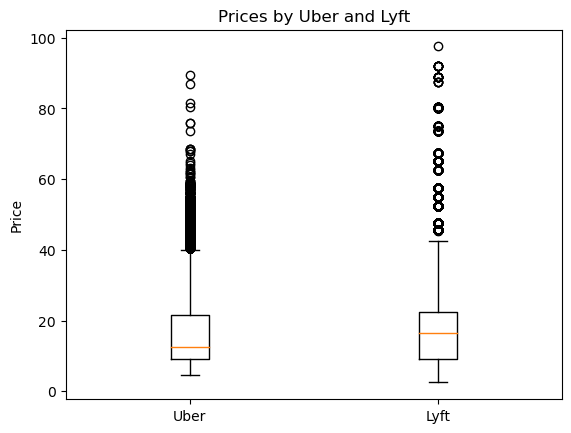

In [19]:
plt.boxplot([clean_data[clean_data['cab_type'] == 'Uber']['price'], clean_data[clean_data['cab_type'] == 'Lyft']['price']], labels = ['Uber', 'Lyft'])
plt.title("Prices by Uber and Lyft")
plt.ylabel("Price")
plt.show()

In [20]:
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoder.fit(clean_data['cab_type'])
#cab_type = encoder.transform(clean_data['cab_type'])
#cab_type

In [21]:
#plt.hist(clean_data[clean_data['cab_type'] == 'Uber']['surge_multiplier'])
#plt.show()

In [22]:
#clean_data[clean_data['cab_type'] == 'Uber']['surge_multiplier'].value_counts()

In [23]:
#plt.hist(clean_data[clean_data['cab_type'] == 'Lyft']['surge_multiplier'])
#plt.show()

In [24]:
#clean_data[clean_data['cab_type'] == 'Lyft']['surge_multiplier'].value_counts()
#plt.plot(clean_data['temperature'].value_counts().reset_index()['index']

In [102]:
#clean_data['source'].value_counts()

In [103]:
#filtered_data = clean_data[clean_data['source'] == 'Boston University']
#filtered_data.value_counts('destination')
#filtered_data.groupby(['destination', 'cab_type']).count()[['price']].reset_index()

In [104]:
#source_price = pd.DataFrame(clean_data.groupby('source').mean()['price'].reset_index())
#source_price

In [105]:
#plt.bar(source_price['source'], source_price['price'])
#plt.xticks(rotation = 45)
#plt.title("Mean Prices by Locations")
#plt.xlabel("Source")
#plt.ylabel("Price")
#plt.show()

In [30]:
#clean_data[clean_data['cab_type'] == 'Lyft']['price'].value_counts()

In [106]:
#source_cab_type = clean_data[['source', 'destination', 'cab_type', 'price']].groupby(['source', 'destination', 'cab_type']).mean().reset_index()
#source_cab_type

In [107]:
#source_cab_type = pd.DataFrame(source_cab_type)
#sorted_source_cab_type = source_cab_type.sort_values(axis = 0, by = 'price', ascending = False).reset_index()
#print(len(sorted_source_cab_type))
#sorted_source_cab_type

In [108]:
#top_50_sorted = sorted_source_cab_type[:50]
#len(top_50_sorted[top_50_sorted['cab_type'] == 'Lyft'])/50

In [63]:
#sns.barplot(x = 'source', y = 'price', hue = 'cab_type', data = source_cab_type)
#plt.xticks(rotation = 45)
#plt.show()

In [64]:
#sns.barplot(x = 'destination', y = 'price', hue = 'cab_type', data = source_cab_type)
#plt.xticks(rotation = 45)
#plt.show()

In [36]:
#source_cab_type_distance = clean_data[['source', 'destination', 'cab_type', 'distance']].groupby(['source', 'destination', 'cab_type']).mean().reset_index()

In [65]:
#sns.barplot(x = 'source', y = 'distance', hue = 'cab_type', data = source_cab_type_distance)
#plt.xticks(rotation = 45)
#plt.show()

In [66]:
#sns.barplot(x = 'destination', y = 'distance', hue = 'cab_type', data = source_cab_type_distance)
#plt.xticks(rotation = 45)
#plt.show()

In [95]:
#source_cab_type[source_cab_type['source'] == 'Financial District']

In [96]:
#source_cab_type[source_cab_type['destination'] == 'Financial District']

In [46]:
outlier_indices = uber_outliers['index'].append(lyft_outliers['index'])

C:\Users\asus\AppData\Local\Temp\ipykernel_13452\1180509814.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outlier_indices = uber_outliers['index'].append(lyft_outliers['index'])


In [47]:
no_outlier_data = clean_data.drop(index = outlier_indices, axis = 'row')

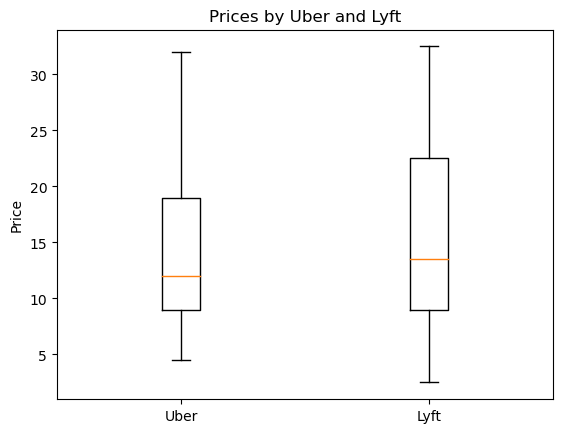

In [48]:
plt.boxplot([no_outlier_data[no_outlier_data['cab_type'] == 'Uber']['price'], no_outlier_data[no_outlier_data['cab_type'] == 'Lyft']['price']], labels = ['Uber', 'Lyft'])
plt.title("Prices by Uber and Lyft")
plt.ylabel("Price")
plt.show()

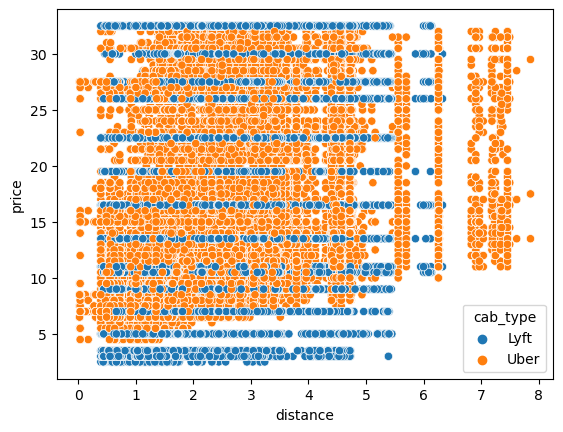

In [50]:
sns.scatterplot(data = no_outlier_data, x = 'distance', y = 'price', hue = 'cab_type')
plt.show()

In [68]:
#ax = sns.scatterplot(data = lyft_data, x = 'distance', y = 'price', hue = 'product_id')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#plt.show()

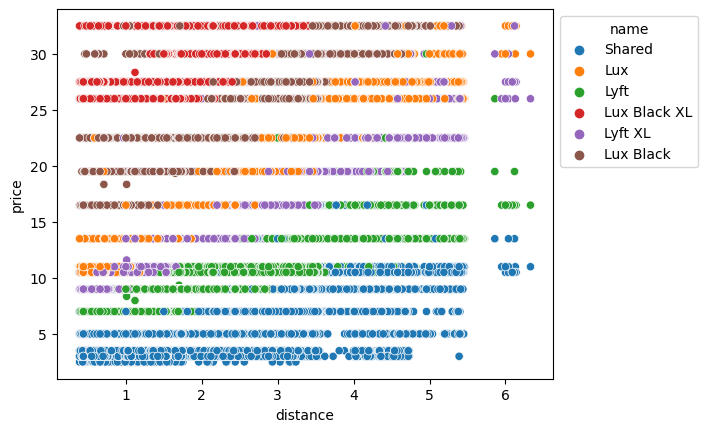

In [69]:
lyft_data = no_outlier_data[no_outlier_data['cab_type'] == 'Lyft']
lyft = sns.scatterplot(data = lyft_data, x = 'distance', y = 'price', hue = 'name')
sns.move_legend(lyft, "upper left", bbox_to_anchor=(1, 1))
plt.show()

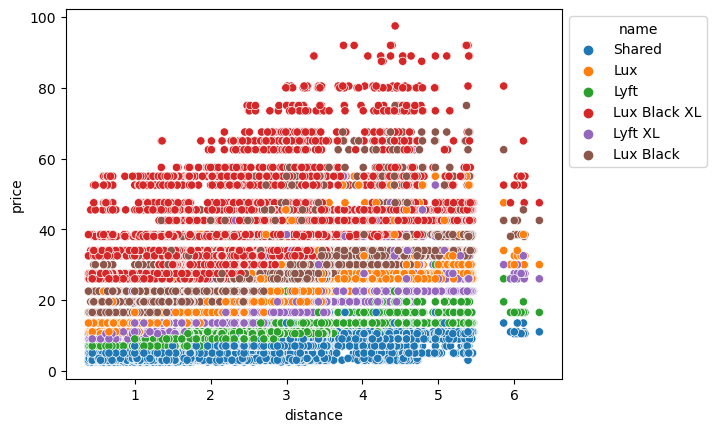

In [79]:
lyft_data = clean_data[clean_data['cab_type'] == 'Lyft']
lyft = sns.scatterplot(data = lyft_data, x = 'distance', y = 'price', hue = 'name')
sns.move_legend(lyft, "upper left", bbox_to_anchor=(1, 1))
plt.show()

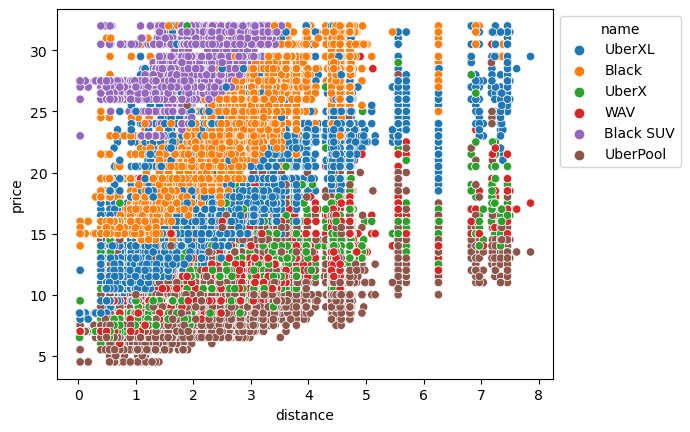

In [72]:
uber_data = no_outlier_data[no_outlier_data['cab_type'] == 'Uber']
uber = sns.scatterplot(data = uber_data, x = 'distance', y = 'price', hue = 'name')
sns.move_legend(uber, "upper left", bbox_to_anchor=(1, 1))
plt.show()

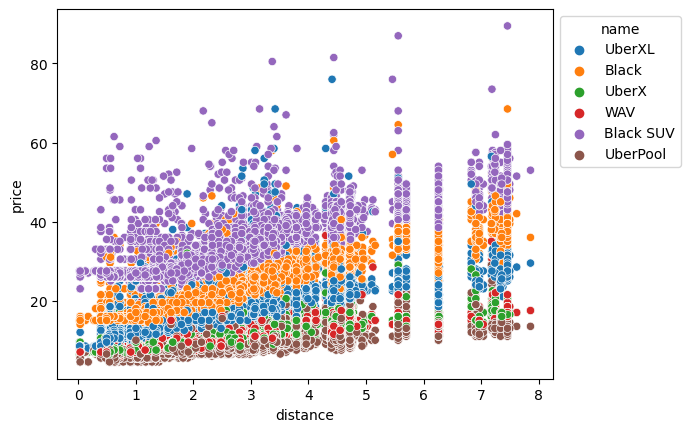

In [80]:
uber_data = clean_data[clean_data['cab_type'] == 'Uber']
uber = sns.scatterplot(data = uber_data, x = 'distance', y = 'price', hue = 'name')
sns.move_legend(uber, "upper left", bbox_to_anchor=(1, 1))
plt.show()

In [99]:
uber_data = clean_data[clean_data['cab_type'] == 'Uber']
uber_q3 = 1.5 * uber_data['price'].quantile(0.75)
uber_outliers = uber_data[uber_data['price'] > uber_q3][['source', 'destination', 'distance', 'price', 'name', 'surge_multiplier']].sort_values(by = 'price', ascending = False).reset_index()
uber_outliers

,index,source,destination,distance,price,name,surge_multiplier
0,164401,Financial District,Northeastern University,7.46,89.5,Black SUV,1.0
1,37083,Financial District,Boston University,5.56,87.0,Black SUV,1.0
2,77859,Financial District,Boston University,4.44,81.5,Black SUV,1.0
3,146566,North Station,Northeastern University,3.37,80.5,Black SUV,1.0
4,155881,Theatre District,Boston University,5.46,76.0,Black SUV,1.0
...,...,...,...,...,...,...,...
17217,596047,Back Bay,South Station,3.45,32.5,Black SUV,1.0
17218,309260,Fenway,Theatre District,2.66,32.5,Black SUV,1.0
17219,436603,North End,Back Bay,2.58,32.5,Black SUV,1.0
17220,309006,Fenway,Financial District,4.40,32.5,Black,1.0


In [98]:
lyft_data = clean_data[clean_data['cab_type'] == 'Lyft']
lyft_q3 = 1.5 * lyft_data['price'].quantile(0.75)
lyft_outliers = lyft_data[lyft_data['price'] > lyft_q3][['source', 'destination', 'distance', 'price', 'name', 'surge_multiplier']].sort_values(by = 'price', ascending = False).reset_index()
lyft_outliers

,index,source,destination,distance,price,name,surge_multiplier
0,597071,Financial District,Fenway,4.43,97.5,Lux Black XL,2.0
1,440000,Financial District,Boston University,5.37,92.0,Lux Black XL,2.0
2,271719,Financial District,Boston University,5.39,92.0,Lux Black XL,2.0
3,301021,Financial District,Boston University,5.36,92.0,Lux Black XL,2.0
4,537453,Boston University,Financial District,4.39,92.0,Lux Black XL,2.0
...,...,...,...,...,...,...,...
21203,505412,Boston University,Theatre District,2.98,34.0,Lux Black XL,1.0
21204,505401,North Station,Boston University,3.15,34.0,Lux Black XL,1.0
21205,505383,Theatre District,Fenway,3.15,34.0,Lux Black XL,1.0
21206,250243,Northeastern University,North Station,3.25,34.0,Lux Black XL,1.0


In [97]:
print(lyft_outliers['name'].value_counts())
print(lyft_outliers.groupby('name').mean()['surge_multiplier'].reset_index())

Lux Black XL    16940
Lux Black        3402
Lux               582
Lyft XL           279
Lyft                5
Name: name, dtype: int64
           name  surge_multiplier
0           Lux          1.744845
1     Lux Black          1.298280
2  Lux Black XL          1.106494
3          Lyft          2.700000
4       Lyft XL          1.977599


C:\Users\asus\AppData\Local\Temp\ipykernel_13452\382828959.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(lyft_outliers.groupby('name').mean()['surge_multiplier'].reset_index())


In [101]:
print(uber_outliers['name'].value_counts())
print(uber_outliers.groupby('name').mean()['surge_multiplier'].reset_index())

Black SUV    15246
Black         1557
UberXL         409
WAV              4
UberX            4
UberPool         2
Name: name, dtype: int64
        name  surge_multiplier
0      Black               1.0
1  Black SUV               1.0
2   UberPool               1.0
3      UberX               1.0
4     UberXL               1.0
5        WAV               1.0


C:\Users\asus\AppData\Local\Temp\ipykernel_13452\2836577790.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(uber_outliers.groupby('name').mean()['surge_multiplier'].reset_index())


## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** (feel free to make multiple cells!)

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

In [51]:
# woah! these things are falling from the sky or something

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:** (feel free to make multiple cells!)

### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. **Be sure to add your partner to the submission as well**.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.